In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import pathlib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#og code = 'https://medium.com/@nitishkundu1993/exploring-resnet50-an-in-depth-look-at-the-model-architecture-and-code-implementation-d8d8fa67e46f'

In [ ]:
local_directory = "/content/drive/MyDrive/P2_Dataset/skin_cancer_segmented/skin_cancer_segmented"

# Convert the string path to a pathlib.Path object
data_directory = pathlib.Path(local_directory)

# Verify that the directory exists
if not data_directory.exists():
    raise FileNotFoundError(f"The directory {local_directory} does not exist.")

# Count the number of images
image_count = len(list(data_directory.glob('*/*.jpg')))

# Print some information about the dataset
print(f"Number of images found: {image_count}")

# List the class names (assuming each subdirectory is a class)
class_names = sorted([item.name for item in data_directory.glob('*') if item.is_dir()])
print(f"Classes found: {class_names}")

# Define the image size and batch size
img_height, img_width = 64,64
batch_size = 32

Number of images found: 10015
Classes found: ['AKIEC', 'BCC', 'BKL', 'DF', 'MEL', 'NV', 'VASC']


In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_directory,validation_split=0.2,subset="training",seed=123,image_size=(img_height, img_width),batch_size=batch_size,label_mode='categorical')

validation_ds = tf.keras.preprocessing.image_dataset_from_directory(data_directory, validation_split=0.2,subset="validation",seed=123, image_size=(img_height, img_width),batch_size=batch_size,label_mode='categorical')

Found 10015 files belonging to 7 classes.
Using 8012 files for training.
Found 10015 files belonging to 7 classes.
Using 2003 files for validation.


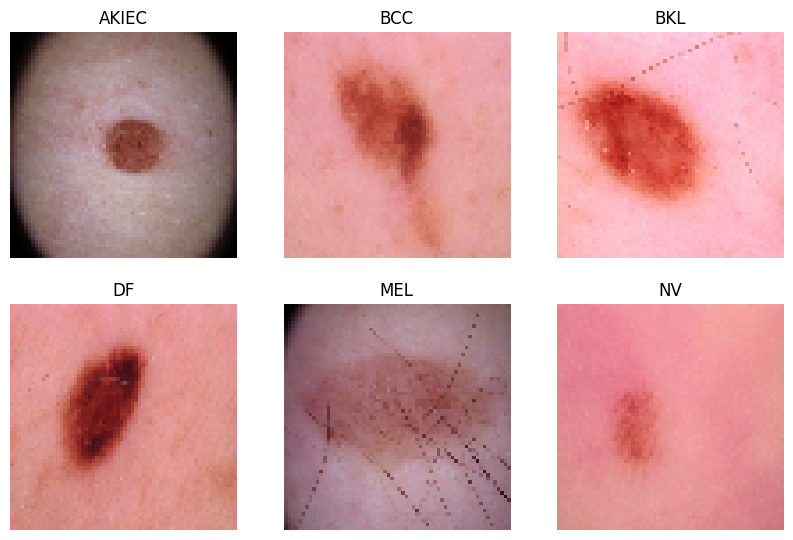

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[i])
        plt.axis("off")

In [ ]:
resnet_model = Sequential()
pretrained_model = tf.keras.applications.ResNet50(include_top=False,input_shape=[img_height, img_width, 3],pooling='avg',weights='imagenet')

for layer in pretrained_model.layers:
    layer.trainable = False
resnet_model.add(pretrained_model)

resnet_model.add(layers.Flatten())
resnet_model.add(layers.Dense(512, activation='relu'))
resnet_model.add(layers.Dense(7, activation='softmax'))




In [ ]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


history = resnet_model.fit(train_ds, validation_data=validation_ds, epochs=10)

Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.6579 - loss: 1.3781

KeyboardInterrupt: 

In [ ]:
# Evaluate the ResNet-50 model
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['validation_accuracy'])
plt.axis(ymin=0.4, ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()



# Model Inference
# Preprocess the sample image
import cv2
image = cv2.imread(str(roses[0]))
image_resized = cv2.resize(image, (img_height, img_width))
image = np.expand_dims(image_resized, axis=0)


# Make predictions
image_pred = resnet_model.predict(image)


# Produce a human-readable output label
image_output_class = class_names[np.argmax(image_pred)]
print("The predicted class is", image_output_class)